In [1]:
import missingno as msno
import pandas as pd
import logging
import sys
import os
import re

In [2]:
# Use the absolute path to the scripts folder
scripts_path = "/home/olani/Documents/kifiya/week2/tellco-analysis/scripts"
sys.path.append(scripts_path)
from data_clean_handler import CleanData
from load_mydata import load_data
from get_dataframe_information import DataFrameInformation
from get_missing_information import MissingInformation

In [3]:
# Now you can use the function
df = load_data('xdr_data')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Handling Missing Values

In [6]:
# Check missing values percentage per column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values.sort_values(ascending=False))

# Depending on the analysis needs, we can drop or fill missing values for specific columns.
# Drop rows with too many missing values or unimportant columns with missing values.
df_cleaned = df.dropna(subset=['Bearer Id', 'IMSI', 'MSISDN/Number'])  # Drop rows where essential IDs are missing.


Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Bearer Id                                    0.660662
Nb of sec with Vol UL < 1250B                0.528663
UL TP < 10 Kbps (%)                          0.527996
50 Kbps < UL TP < 300 Kbps (%)               0.527996
10 Kbps < UL TP < 50 Kbps (%

<Axes: >

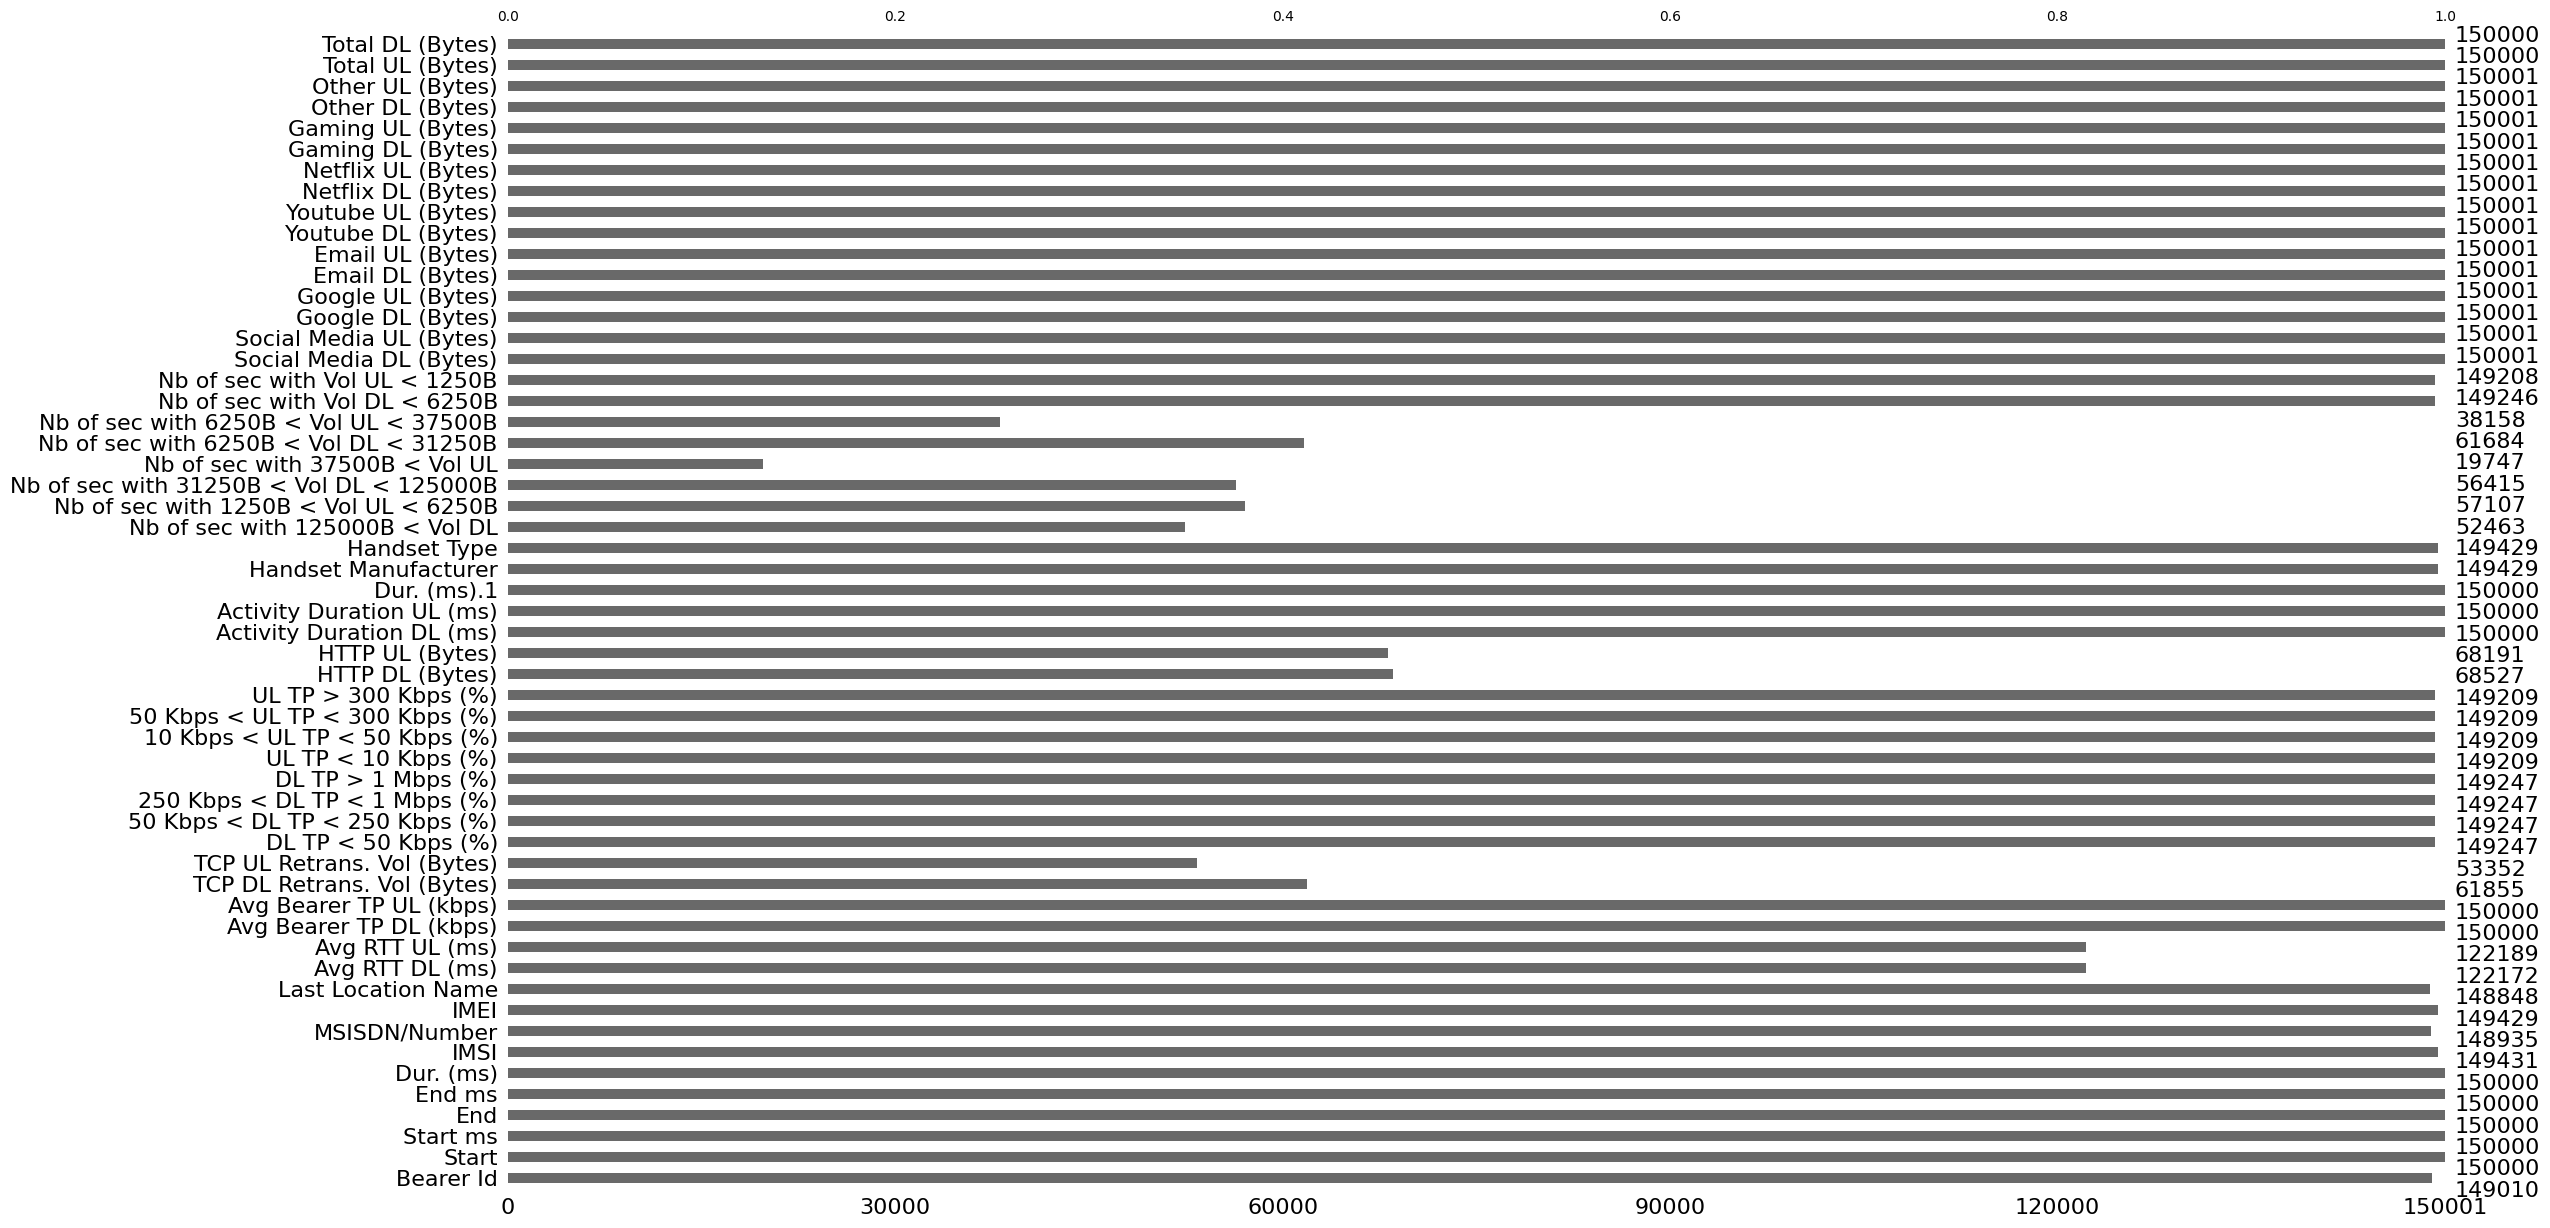

In [7]:
msno.bar(df)

<Axes: >

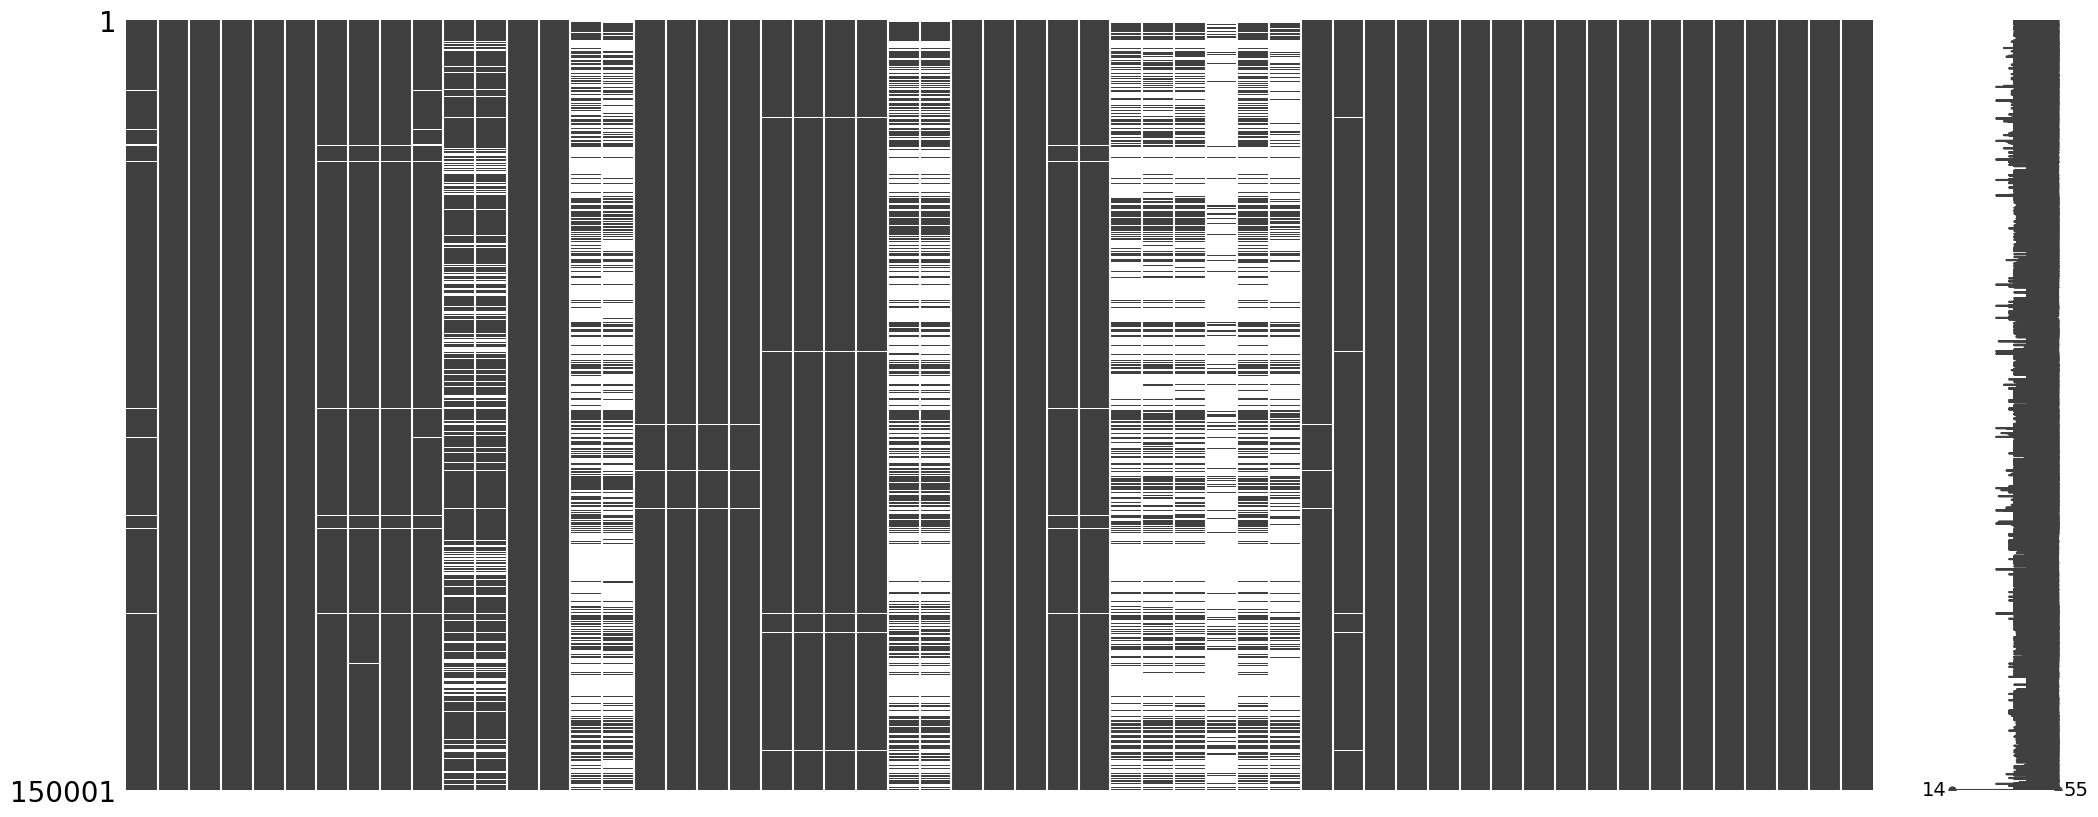

In [8]:
msno.matrix(df)

<Axes: >

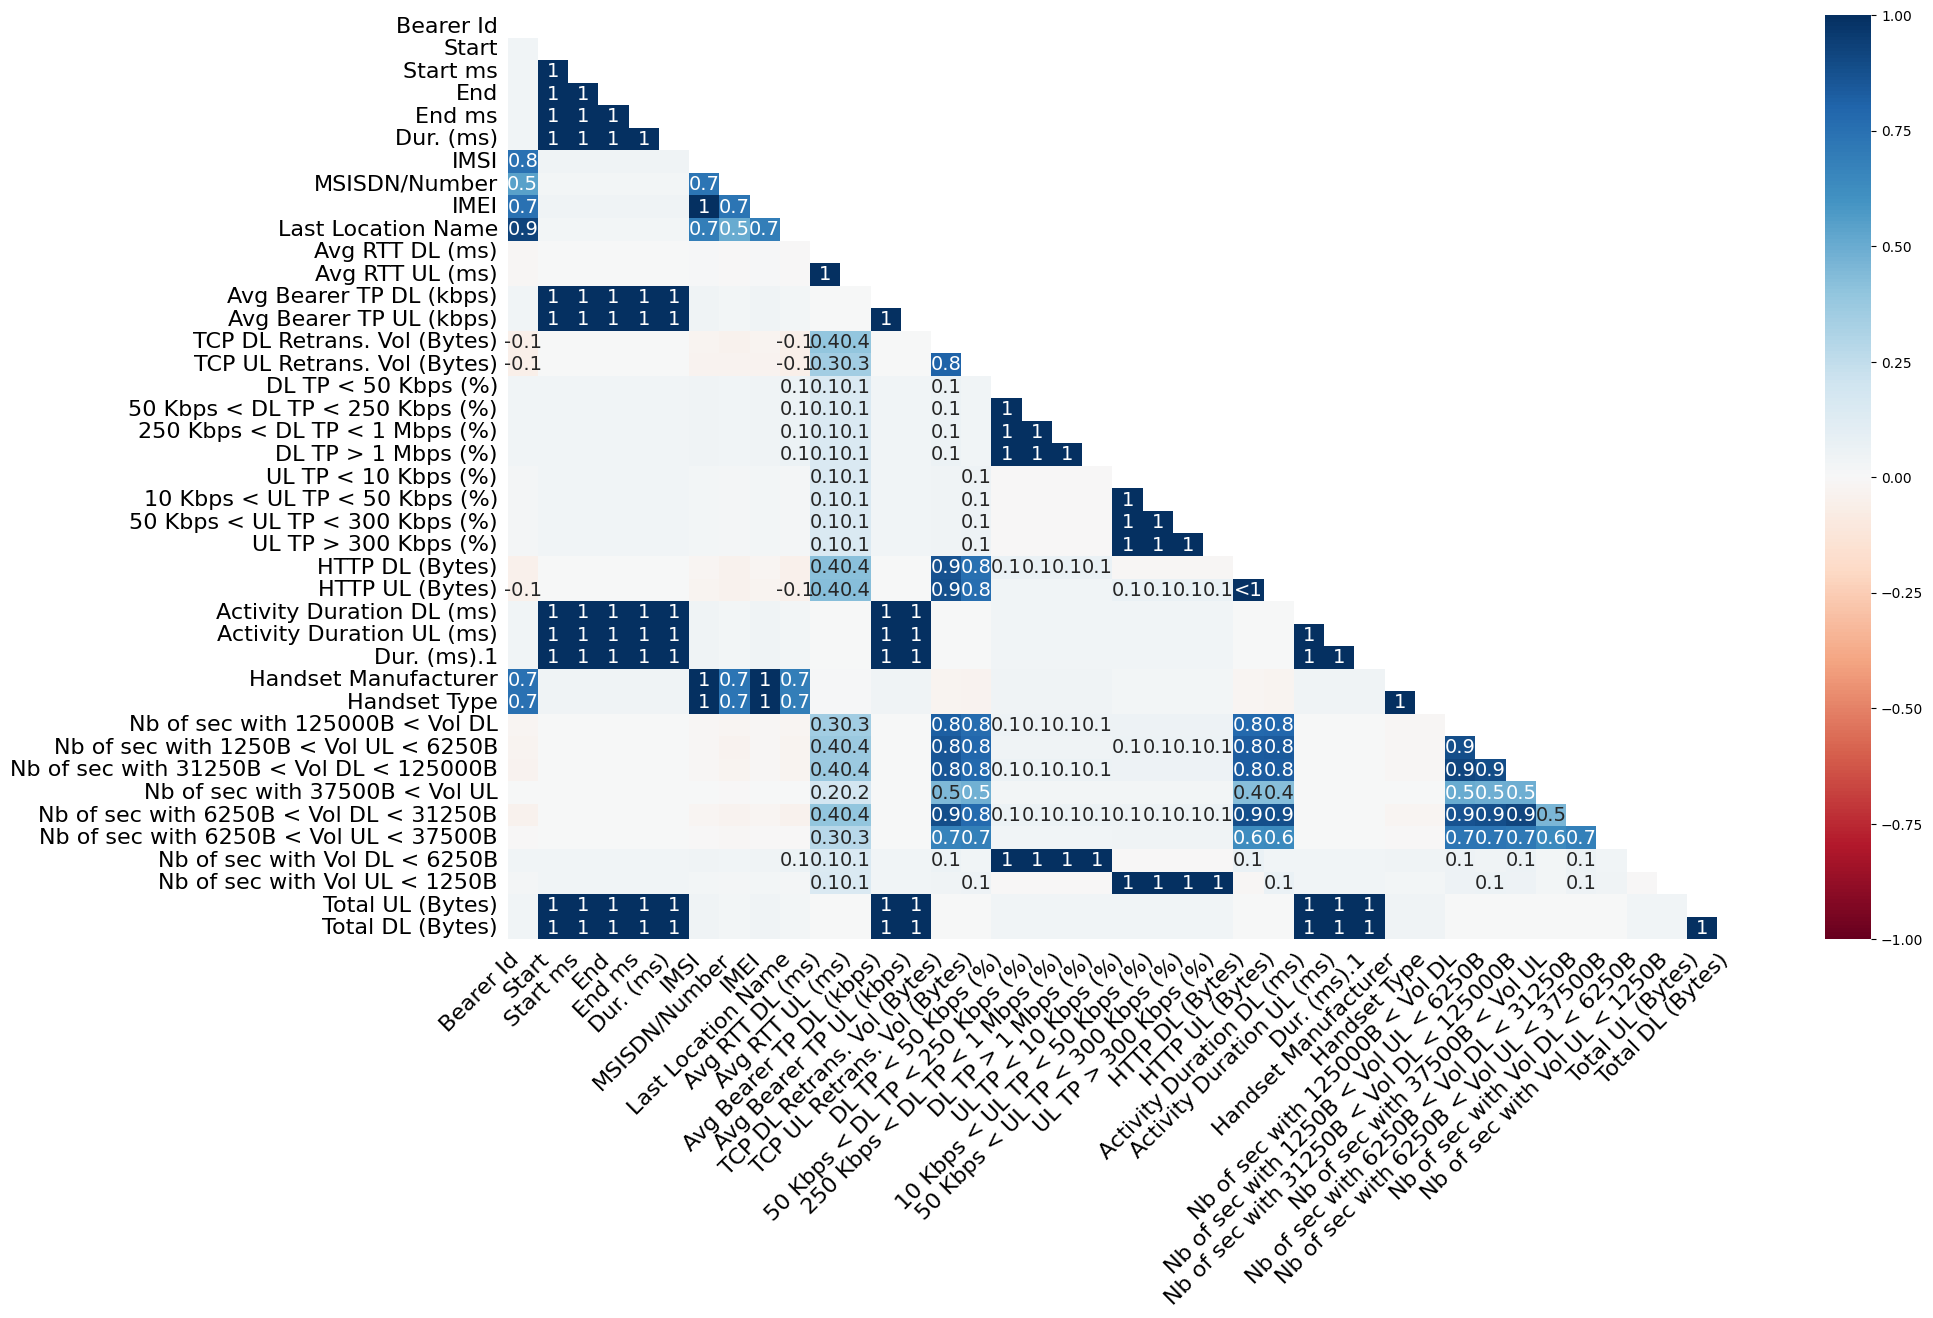

In [9]:
msno.heatmap(df)

<Axes: >

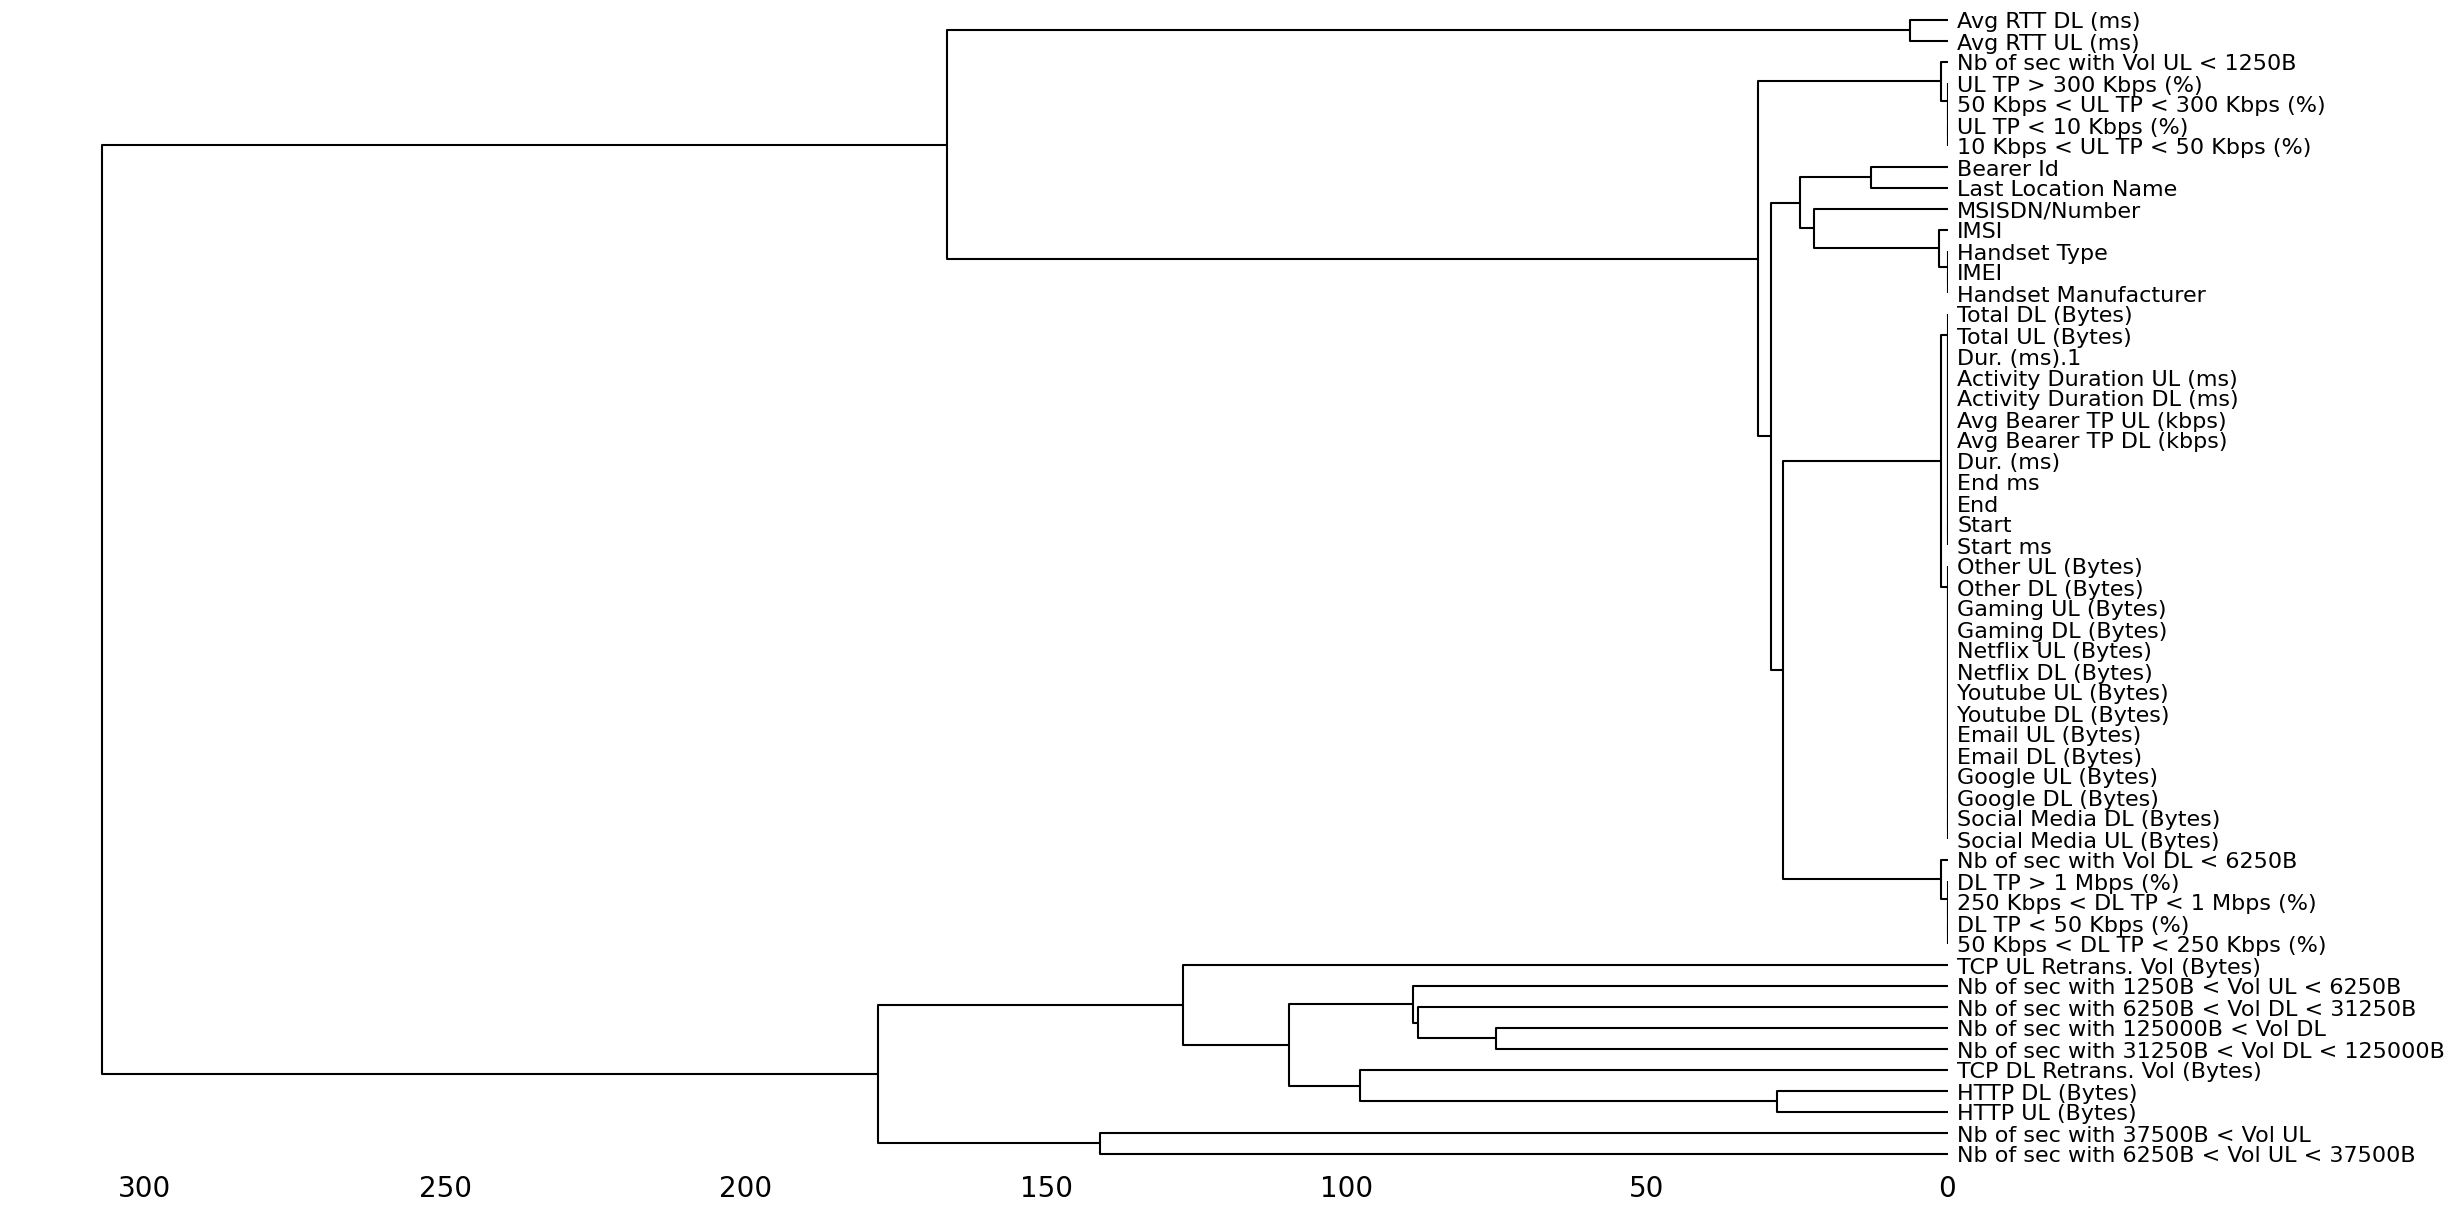

In [10]:
msno.dendrogram(df)

In [11]:
mising_info = MissingInformation(df)

In [12]:
totalCells, missingCount, totalMissing = mising_info.percent_missing(df)
print("The dataset contains", round(
    ((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The dataset contains 12.5 % missing values.


In [13]:
mis_val_table_ren_columns = mising_info.missing_values_table(df)
mis_val_table_ren_columns

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

In [14]:
def convert_dtype(df:pd.DataFrame,columns,dtype):
    for col in columns:
        df[col] = df[col].astype(dtype=dtype)

In [15]:
import io
from unicodedata import category
to_string = ['IMEI', 'IMSI', 'MSISDN/Number']
convert_dtype(df,to_string,'category')

buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()
with open("df_info.txt", "w", encoding="utf-8") as f:
    f.write(s)

#### skewness
we cannot calculate skewness for six column as they are in string or datetim format

,skewness
UL TP < 10 Kbps (%),-8.985016
DL TP < 50 Kbps (%),-2.297803
Google DL (Bytes),-0.008092
Gaming DL (Bytes),-0.003460
Total DL (Bytes),-0.003153
Email DL (Bytes),-0.002463
Total UL (Bytes),-0.002456
Netflix DL (Bytes),-0.002442
Social Media DL (Bytes),-0.002136
Gaming UL (Bytes),-0.001840


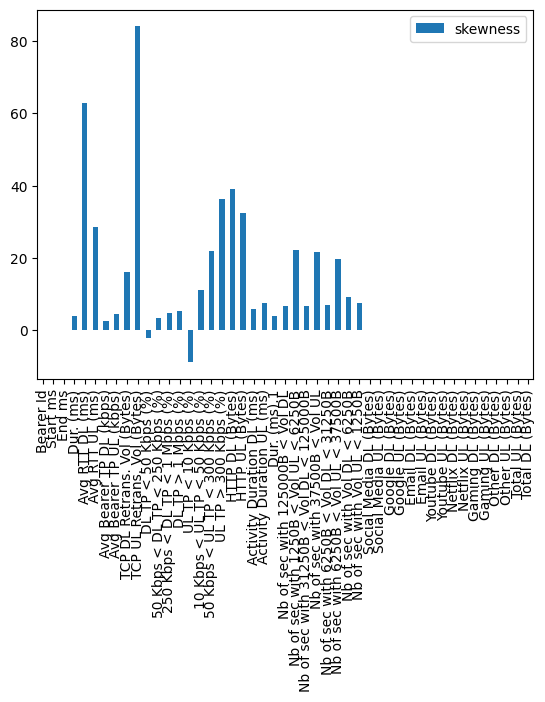

In [16]:
data_info = DataFrameInformation(df)
df_skewness = data_info.get_skewness(df)
df_skewness.plot(kind='bar')
df_skewness.sort_values('skewness')

In [17]:
df1 = data_info.get_skewness_missing_count(df)
df1

,skewness,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,21.560028,130254.0,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,19.642752,111843.0,74.6,float64
Nb of sec with 125000B < Vol DL,6.592502,97538.0,65.0,float64
TCP UL Retrans. Vol (Bytes),84.113393,96649.0,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,6.610541,93586.0,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,22.035745,92894.0,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,6.896050,88317.0,58.9,float64
TCP DL Retrans. Vol (Bytes),15.951809,88146.0,58.8,float64
HTTP UL (Bytes),32.474970,81810.0,54.5,float64
HTTP DL (Bytes),38.944710,81474.0,54.3,float64


<Axes: ylabel='Density'>

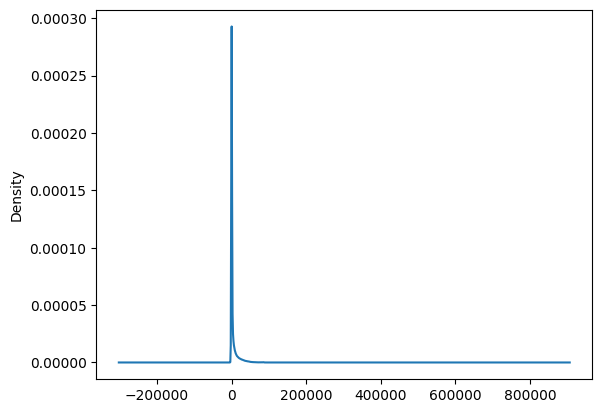

In [18]:
df['Nb of sec with Vol UL < 1250B'].plot(kind='kde')

### Cleaning Data

  1. Drop column with missing value percentage > 30%
  2. Fill missing values with mean, median, mode, bfill, ffill, etc
  3. Mean and median is for numeric column only.
  
Mean/Median/Mode Imputation for less than 3% missing values. mode is good when the data distribution is skewed, and mean.media is good for data that are not skewed.

   1. For the Timestamp columns (start,end).) I will use ffill as they are skewed have more on 1 missing value. Since the duration is provided they may not be important for the objective.
   2. For the columns {Start, Start ms,End ms,Dur. (ms).1, Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps), Total DL (Bytes), Avg Bearer TP DL (kbps), ),Total UL (Bytes), Activity Duration DL (ms),Activity Duration UL (ms), End } are related to time/duration and have 1 missing values. droping the row with the missing values will not be a problem
   3. For the numeric column ... I will use mean as they are not skewed have more than 15% but less than 30% missing values
   4. For the numeric column ... I will use mean as they are not skewed have more than 15% but less than 30% missing values
   5. For the text column(Handset Manufacturer, Handset Type, and last location name, ) I will use mode are not numeric and we can found their mode easily, the % of missing value is more than 15% but less than 30% missing values

In [19]:
df_clean = df.copy()
data_cleaner = CleanData(df_clean)

In [20]:
df_clean = data_cleaner.drop_missing_count_greaterthan_20p(df_clean)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Bearer Id                       149010 non-null  float64 
 1   Start                           150000 non-null  object  
 2   Start ms                        150000 non-null  float64 
 3   End                             150000 non-null  object  
 4   End ms                          150000 non-null  float64 
 5   Dur. (ms)                       150000 non-null  float64 
 6   IMSI                            149431 non-null  category
 7   MSISDN/Number                   148935 non-null  category
 8   IMEI                            149429 non-null  category
 9   Last Location Name              148848 non-null  object  
 10  Avg RTT DL (ms)                 122172 non-null  float64 
 11  Avg RTT UL (ms)                 122189 non-null  float64 
 12  Av

all the column with missing values with precent of less than 20 and greater than 0.4 are replaced with mode as they are skewed. however for the 'MSISDN/Number','IMEI' and 'MSI' we cannot do that because it should be unique, there should be no duplicate

In [21]:
#get the columns
fill_mode = df1[(df1['% of Total Values'] < 20.0) 
               & 
               (df1['% of Total Values'] >= 0.4)].index.tolist()
not_fill_mode = ['IMEI', 'IMSI', 'MSISDN/Number']

fill_mode_column = [x for x in fill_mode if x not in not_fill_mode]

In [22]:
df_clean = data_cleaner.fill_mode(df_clean,fill_mode_column)

In [23]:
missing_info = MissingInformation(df_clean)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,category
IMEI,572,0.4,category
IMSI,570,0.4,category
End,1,0.0,object
Start ms,1,0.0,float64
Dur. (ms),1,0.0,float64
Start,1,0.0,object
End ms,1,0.0,float64
Avg Bearer TP DL (kbps),1,0.0,float64
Avg Bearer TP UL (kbps),1,0.0,float64


In [24]:
df_clean.dropna(inplace=True)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,% of Total Values,Dtype


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148935 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Bearer Id                       148935 non-null  float64 
 1   Start                           148935 non-null  object  
 2   Start ms                        148935 non-null  float64 
 3   End                             148935 non-null  object  
 4   End ms                          148935 non-null  float64 
 5   Dur. (ms)                       148935 non-null  float64 
 6   IMSI                            148935 non-null  category
 7   MSISDN/Number                   148935 non-null  category
 8   IMEI                            148935 non-null  category
 9   Last Location Name              148935 non-null  object  
 10  Avg RTT DL (ms)                 148935 non-null  float64 
 11  Avg RTT UL (ms)                 148935 non-null  float64 
 12  Avg Bea

finally, save the clean dataframe to csv file

In [27]:
df_clean
df_clean.to_csv('../data/clean_data.csv',index=False)